In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from utils import *

In [22]:
class_dict = {
    0 : "Airplane",
    1 : "Automobile",
    2 : "Bird",
    3 : "Cat",
    4 : "Deer",
    5 : "Dog",
    6 : "Frog",
    7 : "Horse",
    8 : "Ship",
    9 : "Truck"
}

In [23]:
def load_pickle(experiment_name):
    with open('{}.pickle'.format(experiment_name), 'rb') as handle:
        experiment = pickle.load(handle)
        
    return experiment

In [24]:
def visualize_preds(experiment):
    plt.clf()
    
    # calculate stats
    gts = experiment.gt
    classes = np.unique(gts).astype(int)
    
    init_preds = experiment.init_pred
    
    last_preds = experiment.last_pred
    
    heatmap_init = np.zeros((len(classes), len(classes)))
    heatmap_last = np.zeros((len(classes), len(classes)))
    
    for class_id in classes:
        init_class_pred = init_preds[gts == class_id]
        last_class_pred = last_preds[gts == class_id]
        
        (unique_init, counts_init) = np.unique(init_class_pred, return_counts=True)

        freqs_init = dict(zip(unique_init, counts_init))
        
        (unique_last, counts_last) = np.unique(last_class_pred, return_counts=True)

        freqs_last = dict(zip(unique_last, counts_last))
        
        for sub_class_id in classes:
            if sub_class_id in freqs_init.keys():
                heatmap_init[class_id, sub_class_id] = freqs_init[sub_class_id]
                
            if sub_class_id in freqs_last.keys():
                heatmap_last[class_id, sub_class_id] = freqs_last[sub_class_id]
                
    
    # visualize
    
    f, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    sn.heatmap(data = heatmap_init, ax=axes[0])
    sn.heatmap(data = heatmap_last, ax=axes[1])
    
    axes[0].set_title("Original Results")
    axes[0].set_ylabel("GroundTruths")
    axes[0].set_xlabel("Predictions")
    
    axes[1].set_title("Attack Results")
    axes[1].set_ylabel("GroundTruths")
    axes[1].set_xlabel("Predictions")
    
    plt.savefig("heatmaps.png")
    
    return heatmap_init, heatmap_last
        

In [25]:
def statistics(experiment):
    stats = experiment.stats

    (unique, counts) = np.unique(stats, return_counts=True)

    freqs = dict(zip(unique, counts))
    
    orig_acc = 1 - freqs[0]/len(stats)
    
    attack_success = freqs[1] / (len(stats) - freqs[0])
    
    print("Original Acc: {:.2f}".format(orig_acc))
    print("Attack Success Rate: {:.2f}".format(attack_success))
    
    init_conf_success = experiment.init_conf[experiment.stats == 1]
    last_conf_success = experiment.last_conf[experiment.stats == 1]
    
    avg_init_conf_success_attacks = np.mean(init_conf_success)
    avg_last_conf_success_attacks = np.mean(last_conf_success)
    
    print("Average Init. Conf. Successful Attacks: {:.2f}".format(avg_init_conf_success_attacks))
    print("Average Last. Conf. Successful Attacks: {:.2f}".format(avg_last_conf_success_attacks))
    
    
    init_conf_unsuccess = experiment.init_conf[experiment.stats == 2]
    last_conf_unsuccess = experiment.last_conf[experiment.stats == 2]
    
    avg_init_conf_unsuccess_attacks = np.mean(init_conf_unsuccess)
    avg_last_conf_unsuccess_attacks = np.mean(last_conf_unsuccess)
    
    print("Average Init. Conf. Unsuccessful Attacks: {:.2f}".format(avg_init_conf_unsuccess_attacks))
    print("Average Last. Conf. Unsuccessful Attacks: {:.2f}".format(avg_last_conf_unsuccess_attacks))
    
        

In [26]:
def visualize_queries(experiment):
    plt.clf()
    queries = experiment.n_queries[experiment.stats == 1]
    
    plt.hist(queries, bins=int(queries.max() / 10) )
    
    plt.title("Num. Queries")
    
    plt.savefig("queries.png")

In [27]:
def vis_noise(experiment):
    plt.clf()
    
    success_noise = np.mean(experiment.noise[experiment.stats == 1], axis=0).transpose(1, 2, 0)

    plt.imshow(success_noise * 150)
    plt.savefig("noise")
    

In [52]:
def vis_imgs(experiment):
    plt.clf()
    num_imgs = 5
    plt.axis('off')

    f, axes = plt.subplots(3, num_imgs, figsize=(16, 5))
    
    imgs = experiment.imgs[experiment.stats == 1]
    noise = experiment.noise[experiment.stats == 1]
    
    init_conf = experiment.init_conf[experiment.stats == 1]
    last_conf = experiment.last_conf[experiment.stats == 1]
    
    init_pred = experiment.init_pred[experiment.stats == 1]
    last_pred = experiment.last_pred[experiment.stats == 1]
    
    
    indices = np.random.choice(range(imgs.shape[0]), num_imgs)
    
    for i, idx in enumerate(indices):
        axes[0, i].imshow(imgs[idx].transpose(1, 2, 0))
        axes[1, i].imshow((imgs[idx] + noise[idx]).transpose(1, 2, 0))
        
        axes[2, i].imshow(noise[idx].transpose(1, 2, 0) * 150)
        
        axes[0, i].set_xlabel("Conf: {:.2f}".format(init_conf[idx]))
        axes[1, i].set_xlabel("Conf: {:.2f}".format(last_conf[idx]))
        
        axes[0, i].set_title("Class: {}".format(class_dict[init_pred[idx]]))
        axes[1, i].set_title("Class: {}".format(class_dict[last_pred[idx]]))
        
        
    axes[0, 0].set_ylabel("Original")
    axes[1, 0].set_ylabel("Adversarial")
    axes[2, 0].set_ylabel("Noise x 150")
    
    
    f.set_tight_layout(True)
    plt.savefig("imgs.png", bbox_inches='tight')
        

Original Acc: 0.86
Attack Success Rate: 0.60
Average Init. Conf. Successful Attacks: 0.98
Average Last. Conf. Successful Attacks: 0.52
Average Init. Conf. Unsuccessful Attacks: 1.00
Average Last. Conf. Unsuccessful Attacks: 1.00


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

<Figure size 432x288 with 0 Axes>

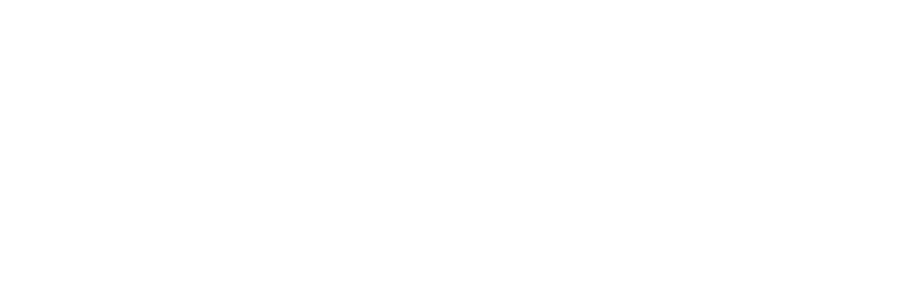

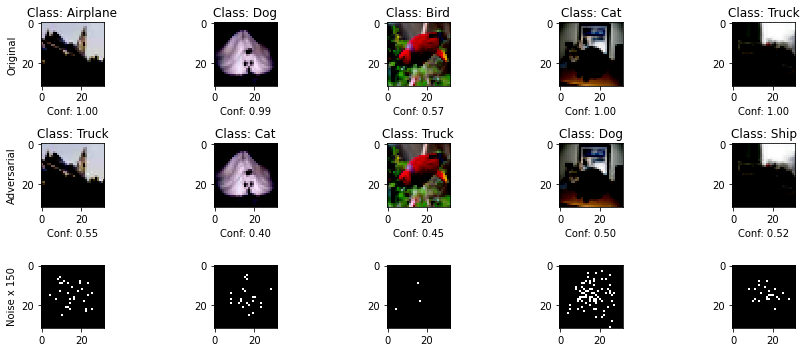

In [59]:
experiment = load_pickle("experiment_1")
visualize_preds(experiment)
statistics(experiment)
visualize_queries(experiment)
vis_noise(experiment)
vis_imgs(experiment)